<a href="https://colab.research.google.com/github/kushXpai/FinChat/blob/main/FinChat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json

with open('/content/data.json', 'r') as f:
    intents = json.load(f)

print(intents)


{'intents': [{'tag': 'welcome', 'patterns': ['Hi', 'Hello', 'How are you', 'whats up', 'How do you do', 'How’s the day?', 'Hey are you there', 'How is everything going', 'glad to meet you'], 'responses': ['Hello', 'Glad to see you again', 'Hi there, How can I help  you', 'Hello! what you are looking for?', 'Hello, how may I help you']}, {'tag': 'endingnote', 'patterns': ['see you. bye', 'Good Bye', 'ok then bye', 'That’ s enough for me', ' Im leaving', 'See u later! Goodbye', 'nice to meet you', 'The bargaining session was fun!I’m happy that I got it at cheap price, see u again', 'Enjoyed the experience, good bye'], 'responses': ['Hey, Thank you for visiting', 'Hope to see you again, it was nice talking with you', ' wish you a good day! Hope to have a talk with you later', 'Thanks for your time with us.Hope you enjoyed it and satisfied. See you later', 'Sad to see you go. Come whenever you need to bye from us. Stay intouch.']}, {'tag': 'name', 'patterns': ['whats you name?', 'who are y

In [ ]:
import numpy as np
import random
import json
import torch
import torch.nn as nn

import nltk
nltk.download('punkt')

from nltk.stem.porter import PorterStemmer
from torch.utils.data import Dataset, DataLoader
nltk.download('all')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru 

True

In [ ]:
!pip3 install graphviz
!pip3 install torchviz

In [ ]:
from torchviz import make_dot,make_dot_from_trace

In [ ]:
def tokenize(sentence):
    return nltk.word_tokenize(sentence)

In [ ]:
stemmer = PorterStemmer()
def stem(word):
    return stemmer.stem(word.lower())

In [ ]:
def BagOfWords(tokenized_sentence, words):
    sentence_words = [stem(word) for word in tokenized_sentence]
    Bag = np.zeros(len(words), dtype=np.float32)
    for idx, w in enumerate(words):
        if w in sentence_words:
            Bag[idx] = 1
    return Bag

In [ ]:
sentence=["hi","im","ola","hello"]
words=["hi","how","are","you"]
BagOfWords(sentence,words)

array([1., 0., 0., 0.], dtype=float32)

In [ ]:
all_the_words = []

tags = []

pair = []

for intent in intents['intents']:
    tag = intent['tag']

    tags.append(tag)
    for pattern in intent['patterns']:
        w = tokenize(pattern)

        all_the_words.extend(w)

        pair.append((w, tag))

ignore_words = ['?', '.', '!',',']
all_the_words = [stem(w) for w in all_the_words if w not in ignore_words]

all_the_words = sorted(set(all_the_words))
tags = sorted(set(tags))

print(len(pair), "patterns")
print(len(tags), "tags:", tags)
print(len(all_the_words), "unique stemmed words:", all_the_words)

298 patterns
47 tags: ['Asset allocation', 'AsymmetricInformation', 'Balance sheet', 'Bank Run', 'Bank capital', 'Bank reserves', 'Bargain offer', 'Bond market', 'Capital market', 'Capital ratio', 'Compound interest', 'Credit risk', 'Crowdfunding', 'Demonetisation', 'FICO score', 'Financial crisis', 'Monetary stability', 'Moral hazard', 'Net Worth', 'PRA', 'Ring Fence', 'Term life insurance', 'Thank you', 'VAR', 'bail-out', 'bank', 'bank assests', 'bitcoin', 'cryptocurrency', 'deliveryoption', 'endingnote', 'leverage', 'liquidity', 'liquidity trap', 'location', 'name', 'narrow money', 'nominal interest rate', 'passporting', 'payments', 'price of a saree', 'price of formal wear', 'real interest rate', 'shopping', 'time period', 'todaysOffers', 'welcome']
209 unique stemmed words: ["'s", '2016', '`', 'a', 'about', 'accept', 'address', 'again', 'all', 'alloc', 'an', 'and', 'ani', 'are', 'asset', 'asymmetr', 'at', 'author', 'averag', 'bail-out', 'bailout', 'balanc', 'bank', 'bargain', 'be'

In [ ]:
x_train = []
y_train = []

for (pattern_sentence, tag) in pair:
    bag = BagOfWords(pattern_sentence, all_the_words)
    x_train.append(bag)
    label = tags.index(tag)
    y_train.append(label)
#array
x_train = np.array(x_train)
y_train = np.array(y_train)

num_epochs = 1000
batch_size = 8
learning_rate = 0.001

input_size = len(x_train[0])
hidden_size = 8
output_size = len(tags)

print("inputsize=",input_size)
print("outputsize=",output_size)

inputsize= 209
outputsize= 47


In [ ]:
class ChatDataset(Dataset):
    def __init__(self):
        self.n_samples = len(x_train)
        self.x_data = x_train
        self.y_data = y_train

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.n_samples

In [ ]:
class NeuralNetModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetModel, self).__init__()

        self.linearlayer1 = nn.Linear(input_size, hidden_size)

        self.bn1= nn.BatchNorm1d(hidden_size)

        self.linearlayer2 = nn.Linear(hidden_size, hidden_size)
        self.bn2= nn.BatchNorm1d(hidden_size)

        self.linearlayer3 = nn.Linear(hidden_size, num_classes)

        self.relu = nn.ReLU()

    def forward(self, x):

        output = self.linearlayer1(x)

        output = self.relu(output)

        output = self.linearlayer2(output)

        output = self.relu(output)
        output = self.linearlayer3(output)
        return output

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NeuralNetModel(input_size, hidden_size, output_size).to(device)

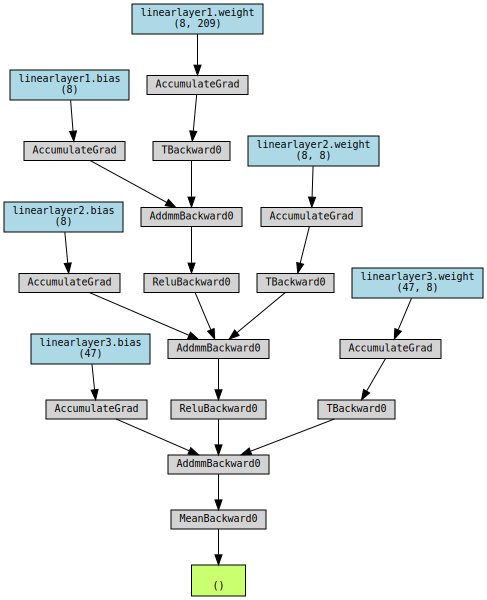

In [ ]:
x=torch.randn(47,209)
y=model(x)
make_dot(y.mean(),params=dict(model.named_parameters()))

In [ ]:
def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)
count_parameters(model)

2207

In [ ]:
dataset = ChatDataset()
train_loader = DataLoader(dataset=dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=0)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NeuralNetModel(input_size, hidden_size, output_size).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
total=0
correct=0

for epoch in range(num_epochs):
    for (words, labels) in train_loader:
        words = words.to(device)
        labels = labels.to(dtype=torch.long).to(device)


        outputs = model(words)

        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scores = model(words)
        _, pred = scores.max(1)
        total += len(words)
        correct += (pred==labels).sum()
    if (epoch+1) % 10 == 0:
        print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f} And Got {correct} / {total} with accuracy {float(correct)/float(total)*100:.2f}')
print(f'final Accuracy-----> Got {correct} / {total} with accuracy {float(correct)/float(total)*100:.2f}')
print(f'final loss: {loss.item():.4f}')

data = {
"model_state": model.state_dict(),
"input_size": input_size,
"hidden_size": hidden_size,
"output_size": output_size,
"all_words": all_the_words,
"tags": tags
}

FILE = "DATA.pth"
torch.save(data, FILE)

print(f'training complete. file saved to {FILE}')

Epoch [10/1000], Loss: 3.4500 And Got 163 / 2980 with accuracy 5.47
Epoch [20/1000], Loss: 3.7642 And Got 716 / 5960 with accuracy 12.01
Epoch [30/1000], Loss: 1.4050 And Got 1440 / 8940 with accuracy 16.11
Epoch [40/1000], Loss: 1.7217 And Got 2654 / 11920 with accuracy 22.27
Epoch [50/1000], Loss: 1.0401 And Got 4629 / 14900 with accuracy 31.07
Epoch [60/1000], Loss: 0.2186 And Got 7253 / 17880 with accuracy 40.56
Epoch [70/1000], Loss: 0.1823 And Got 10057 / 20860 with accuracy 48.21
Epoch [80/1000], Loss: 0.0652 And Got 12944 / 23840 with accuracy 54.30
Epoch [90/1000], Loss: 0.0394 And Got 15869 / 26820 with accuracy 59.17
Epoch [100/1000], Loss: 0.1252 And Got 18798 / 29800 with accuracy 63.08
Epoch [110/1000], Loss: 0.0085 And Got 21724 / 32780 with accuracy 66.27
Epoch [120/1000], Loss: 0.0507 And Got 24654 / 35760 with accuracy 68.94
Epoch [130/1000], Loss: 0.0045 And Got 27580 / 38740 with accuracy 71.19
Epoch [140/1000], Loss: 0.0178 And Got 30503 / 41720 with accuracy 73.11

In [ ]:
FILE = "DATA.pth"
data = torch.load(FILE)

input_size = data["input_size"]
hidden_size = data["hidden_size"]
output_size = data["output_size"]
all_the_words = data['all_words']
tags = data['tags']
model_state = data["model_state"]

model = NeuralNetModel(input_size, hidden_size, output_size).to(device)
model.load_state_dict(model_state)
model.eval()

NeuralNetModel(
  (linearlayer1): Linear(in_features=209, out_features=8, bias=True)
  (bn1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linearlayer2): Linear(in_features=8, out_features=8, bias=True)
  (bn2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linearlayer3): Linear(in_features=8, out_features=47, bias=True)
  (relu): ReLU()
)

In [ ]:
import random
def bargain(value):
    tokens = nltk.word_tokenize(value)

    tagged = nltk.pos_tag(tokens)
    bot_name="FinBot"

    entities = nltk.chunk.ne_chunk(tagged)

    numbers = {"1": 1, "2": 2, "3": 3, "4": 4, "5": 5, "6": 6, "7": 7, "8": 8, "9": 9, "10" : 10,"11": 11,"12": 12,"13": 13,"14": 14,"15": 15,"16": 16,"17": 17,"18": 18,"19": 19,"20": 20,"21": 21,"22": 22,"23": 23,"24": 24,"25": 25,"26": 26,"27": 27,"28": 28,"29":29,"30": 30}
    OptionsToReply=["Sorry, this is of latest fashion, Can you raise the amount a little bit","This is a very special thing, we can't give you at this much less cost","Oh no sorry. Please raise a little bit"]
    for word, wordType in entities:
        word = stemmer.stem(word)

        if (wordType in ['CD'] and word in numbers):
               if numbers[word] >20:
                 print("FinBot:Yes agreed! Now,you can buy the ribbon at this price")
               elif numbers[word] <=20:
                 print(f"{bot_name}: {random.choice(OptionsToReply)}")
               else:
                  break

In [ ]:
bargain('15')

FinBot: Oh no sorry. Please raise a little bit


In [ ]:
bargain('20')

FinBot: Oh no sorry. Please raise a little bit


In [ ]:
bargain('25')

FinBot:Yes agreed! Now,you can buy the ribbon at this price


In [ ]:
bot_name = "FinBot"

name=input("Enter Your Name: ")
print("FinBot:Hey, Let's chat! (type 'quit' to exit)Also when you start bargaining give digits")
while True:
    sent=input(name+':')
    if sent == "quit":
        break

    if sent in ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30"]:
       bargain(sent)
    else:
        sent = tokenize(sent)
        X = BagOfWords(sent, all_the_words)
        X = X.reshape(1, X.shape[0])
        X = torch.from_numpy(X).to(device)

        output = model(X)
        _, predicted = torch.max(output, dim=1)

        tag = tags[predicted.item()]

        probs = torch.softmax(output, dim=1)
        prob = probs[0][predicted.item()]
        if prob.item() > 0.75:
            for intent in intents['intents']:
                if tag == intent["tag"]:
                    print(f"{bot_name}: {random.choice(intent['responses'])}")
        else:
            print(f"{bot_name}: I do not understand...")